In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

In [2]:
%run ../database.ipynb

In [3]:
df = pd.DataFrame(get_all_content())

In [23]:
preprocessed_text_list = df["preprocessed_text"]
preprocessed_token_list = df["preprocessed_token"]
sentiment_label_list = df["siebert_sentiment_label"]
sentiment_score_list = df["siebert_sentiment_score"]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(preprocessed_text_list).toarray()

In [ ]:
word_stats = []

unique_words = set(word for text in preprocessed_text_list for word in text.split())

for word in unique_words:
    contains_word = []
    not_contains_word = []

    for text, sentiment in zip(preprocessed_text_list, sentiment_score_list):
        if word in text.split():
            contains_word.append(sentiment)
        else:
            not_contains_word.append(sentiment)

    if len(contains_word) > 1 and len(not_contains_word) > 1:
        t_stat, p_value = ttest_ind(contains_word, not_contains_word, equal_var=False)
        word_stats.append((word, np.mean(contains_word), t_stat, p_value))

word_stats_df = pd.DataFrame(word_stats, columns=["Word", "Mean Sentiment", "t-Statistic", "p-Value"])

significant_words = word_stats_df[word_stats_df["p-Value"] < 0.05].sort_values(by="t-Statistic", ascending=False)

print(significant_words.head(20))

c:\Users\wwwhh\OneDrive\Desktop\fyp backend\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


                      Word  Mean Sentiment  t-Statistic  p-Value
16441       pocketfriendly        0.998899    57.279224      0.0
17820                momos        0.998899    57.279224      0.0
17049               eatery        0.998887    57.279073      0.0
24195                  eau        0.998886    57.277137      0.0
30089           pressfield        0.998869    57.275246      0.0
28845             cromwell        0.998863    57.273573      0.0
14449                 cafe        0.998827    57.270620      0.0
31339           delectable        0.998826    57.268752      0.0
1410                hilary        0.998819    57.267731      0.0
12156               mantel        0.998819    57.267731      0.0
29939              renault        0.998820    57.267178      0.0
734    guangzhounguangzhou        0.998808    57.266960      0.0
31075           ecommercen        0.998814    57.266236      0.0
33592               hoursn        0.998827    57.265443      0.0
22834              umbert

C:\Users\wwwhh\AppData\Local\Temp\ipykernel_32576\1444714596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_words["t-Statistic"], y=top_bottom_words["Word"], palette="coolwarm")


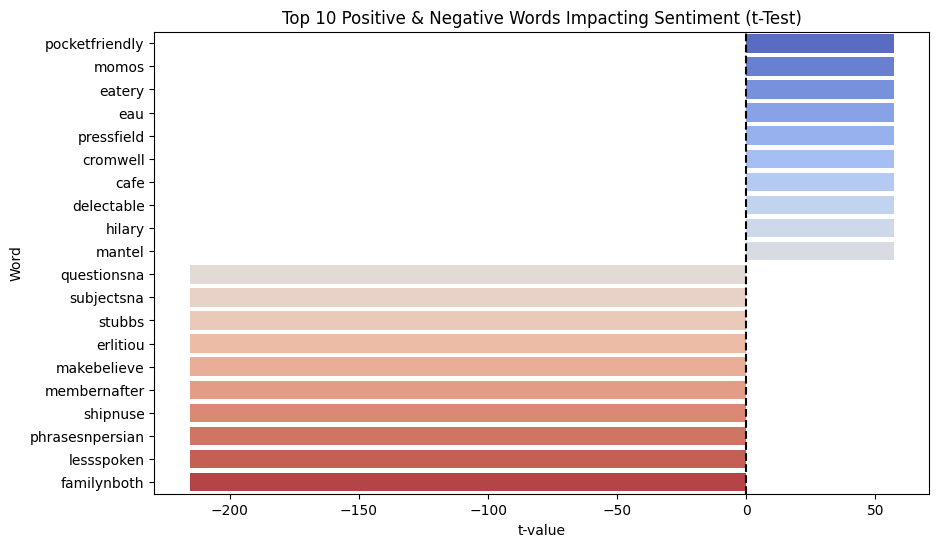

In [ ]:
top_10_words = significant_words.head(10)
bottom_10_words = significant_words.tail(10)

top_bottom_words = pd.concat([top_10_words, bottom_10_words])

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_words["t-Statistic"], y=top_bottom_words["Word"], palette="coolwarm")

plt.xlabel("t-value")
plt.ylabel("Word")
plt.title("Top 10 Positive & Negative Words Impacting Sentiment (t-Test)")
plt.axvline(x=0, color="black", linestyle="--")
plt.show()

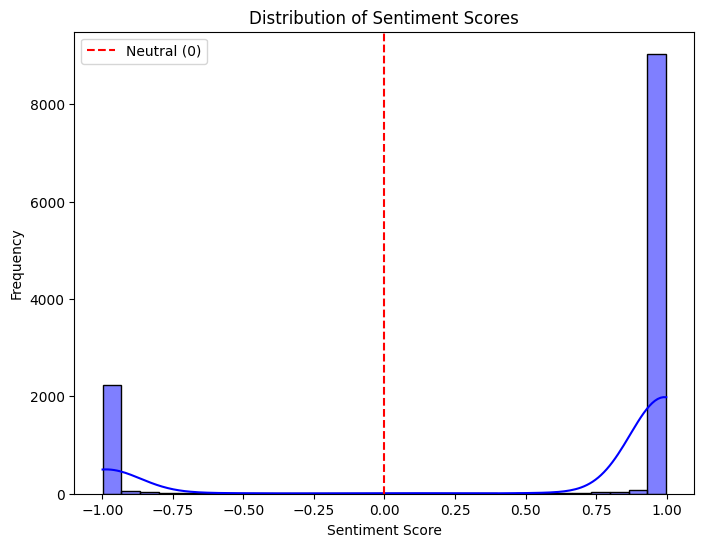

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(sentiment_scores, bins=30, kde=True, color='blue')

plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.axvline(x=0, color="red", linestyle="--", label="Neutral (0)")
plt.legend()
plt.show()